In [46]:
import os
import cv2
import random
import numpy as np
!pip install threadpoolctl --upgrade

import pandas as pd 
import seaborn as sns

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt

## Data Loading

In [47]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
train_img = [] #contains the images used for training the model
test_img = []
train_labels = [] #label of each image in x_train 
test_labels = []
TRAIN_PATH = 'archive/Training'
TEST_PATH = 'archive/Testing'
new_size = (255, 255)

for label in labels:
    img_dir = os.path.join(TRAIN_PATH, label)
    for img_file in os.listdir(img_dir):
        img = cv2.imread(f'{img_dir}/{img_file}')
        img = cv2.resize(img, new_size)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)/255
        train_img.append(img)
        train_labels.append(label)
        
train_img = np.stack(train_img)
train_labels = np.stack(train_labels)

print("train_img shape : ", train_img.shape)
print("train_labels shape : ", train_labels.shape)

for label in labels:
    img_dir = os.path.join(TEST_PATH, label)
    for img_file in os.listdir(img_dir):
        img = cv2.imread(f'{img_dir}/{img_file}')
        img = cv2.resize(img, new_size)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)/255
        test_img.append(img)
        test_labels.append(label)
        
test_img = np.stack(test_img)
test_labels = np.stack(test_labels)

print("test_img shape : ", test_img.shape)
print("test_labels shape : ", test_labels.shape)

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'pituitary_tumor': 2,
    'meningioma_tumor': 3
}

train_labels = np.array([class_map[label] for label in train_labels])
test_labels = np.array([class_map[label] for label in test_labels])

train_img shape :  (2870, 255, 255)
train_labels shape :  (2870,)
test_img shape :  (394, 255, 255)
test_labels shape :  (394,)


In [48]:
from sklearn.preprocessing import StandardScaler #the Standard Scaler : X2 = (X1 - E(X1))/sqrt(Var(X1))
from sklearn.decomposition import PCA

train_img = train_img.reshape((train_img.shape[0], 255*255))
test_img = test_img.reshape((test_img.shape[0], 255*255))
S = StandardScaler()
X_train = S.fit_transform(train_img)
X_test = S.transform(test_img)

In [49]:
n_comp = np.arange(2, 402, 20)
pca = PCA(n_components = 402)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

X = pca_train[:,:2]

In [50]:
print(X)

[[-132.7236434   -18.28288404]
 [-106.87677463   13.08465194]
 [  -7.29993813   37.34990879]
 ...
 [  50.22247048  -47.47532106]
 [  16.88419691   -7.85558887]
 [  19.11180283  -14.27859693]]


## KMeans

Fit and Predict: Training K-Means clusterer on the dataset to find the centroid of each class and assign each instance to the nearest centriod 

In [51]:
from sklearn.cluster import KMeans

In [52]:
k = 4
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [53]:
y_pred

array([2, 2, 2, ..., 0, 0, 0])

In [54]:
kmeans.cluster_centers_

array([[ 48.44534926, -56.43194063],
       [352.76775999, -33.31873411],
       [-68.75426601,  13.93340634],
       [128.56107024, 125.51860497]])

In [55]:
kmeans.predict(pca_test[:,:2])

array([3, 3, 0, 0, 0, 1, 0, 3, 3, 1, 3, 2, 0, 3, 3, 3, 1, 1, 0, 3, 3, 1,
       1, 2, 3, 0, 2, 2, 3, 3, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2, 2, 0, 2, 3,
       2, 1, 1, 1, 0, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 3, 3, 0, 3, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 3, 3, 0, 0, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1,
       3, 2, 1, 0, 1, 1, 3, 3, 3, 0, 1, 1, 1, 1, 0, 1, 3, 3, 3, 2, 0, 3,
       3, 3, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 0, 1, 1, 1, 3, 1, 0, 1, 0, 0,
       1, 3, 0, 1, 2, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 0, 0, 0, 1, 1, 3, 2, 3, 2, 3, 0, 0,
       1, 3, 3, 3, 2, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 0, 2,
       0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 0, 3, 3, 2, 0, 2, 2, 2, 2, 3, 1, 2,
       0, 2, 2, 3, 3, 3, 2, 1, 0, 3, 2, 2, 1, 3, 2, 3, 3, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 2, 3, 0, 1, 2, 3, 3, 3, 3, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 3, 3, 2, 0, 2, 2, 3, 0,

In [56]:
from sklearn.metrics import homogeneity_score
labels_pred = kmeans.labels_
homogeneity_score(train_labels, labels_pred)

0.2010492493891082

## Decision Boundaries

In [57]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

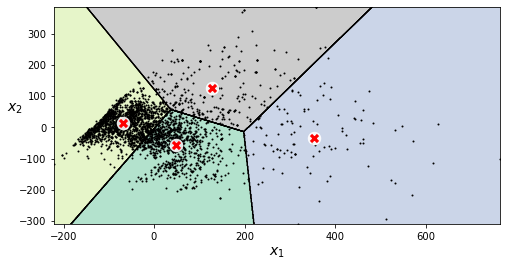

In [58]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X, resolution = 1000)
plt.show()

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.
    
The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), we set `init="random"`, `n_init=1`and `algorithm="full"`.  

In [59]:
kmeans_iter1 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=4, n_init=1,
       random_state=1)

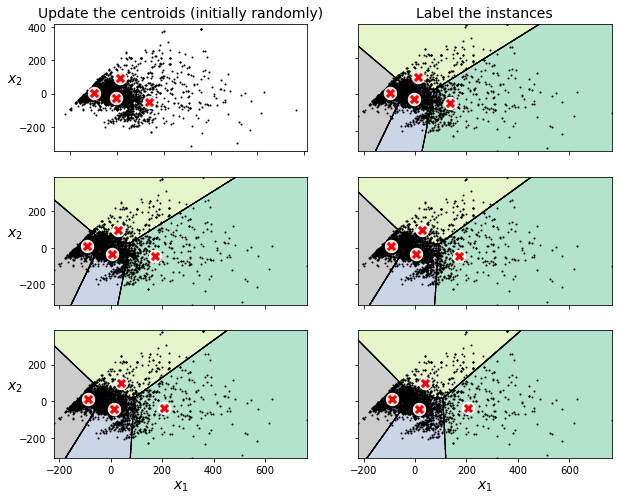

In [60]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='w', cross_color='r')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

## K-Means Variability
In the approach above the centroids are initialised randomly, this means that if K-Means is run with different random seeds it can converge to very different solutions as seen below

In [61]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


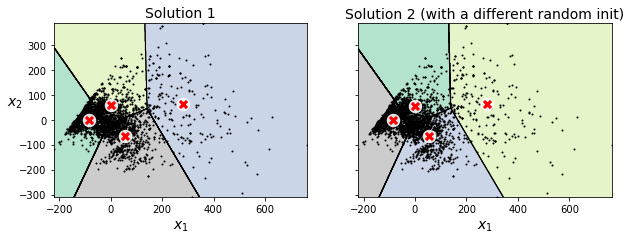

In [62]:
kmeans_rnd_init1 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=4, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

## Inertia
The inertia metric measures the distances between each training instance and its closest centriod 

In [63]:
kmeans.inertia_

15433943.497780371

In [64]:
kmeans.score(X)

-15433943.497780371

## Multiple Initializations

To solve the issue of variability we run the K-Means algorithm multiple times with different random Initialisations and select the solution that minimizes the inertia.

In [65]:
kmeans_rnd_10_inits = KMeans(n_clusters=4, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=4, random_state=2)

This is similar to the first model which is certainly the optimal K-Means solution

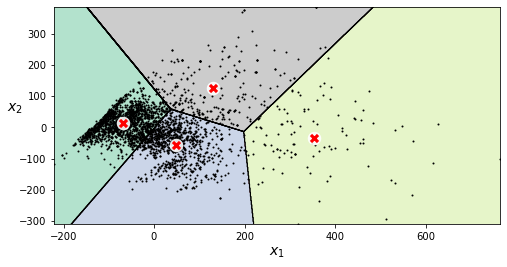

In [66]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

## Mini Batch K-Means
Mini-batch K-Means is much faster than regular K-Means but with a much lower performance.

In [67]:
from sklearn.cluster import MiniBatchKMeans

In [68]:
%timeit KMeans(n_clusters=4, random_state=42).fit(X)

111 ms ± 9.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%timeit MiniBatchKMeans(n_clusters=4, random_state=42).fit(X)

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\User

122 ms ± 9.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Other Clustering Algorithms

### Gaussian Mixture

In [70]:
from sklearn.mixture import GaussianMixture

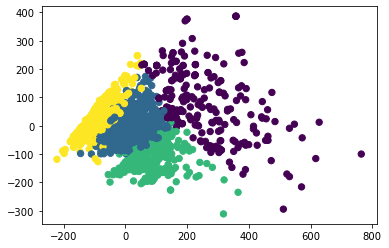

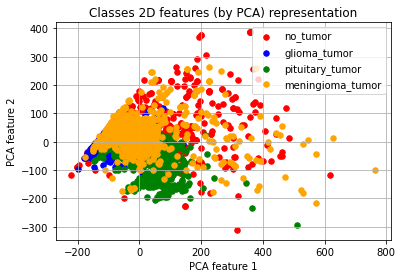

In [71]:
gmm = GaussianMixture(n_components = 4).fit(pca_train)
labels1 = gmm.predict(pca_train)

plt.scatter(pca_train[:,0], pca_train[:,1], c=labels1, s=40, cmap='viridis')

scatter_x = pca_train[:, 0]
scatter_y = pca_train[:, 1]
group = train_labels

cdict = {0: 'red', 1: 'blue', 2: 'green', 3 : "orange"}
identification = {v : k for k,v in class_map.items()}


plt.figure()
plt.grid()
for g in np.unique(group):
    ix = np.where(group == g)
    plt.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = identification[g], s = 30)
plt.legend()
plt.xlabel("PCA feature 1")
plt.ylabel("PCA feature 2")
plt.title("Classes 2D features (by PCA) representation")
plt.show()

In 2D, clusters computed by Gaussain Mixture don't seem to correspond to the 4 classes of the dataset.

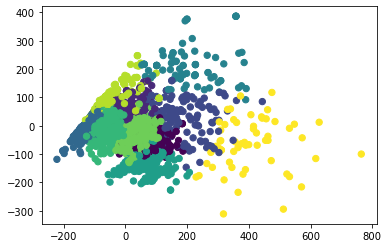

In [72]:
gmm = GaussianMixture(n_components = 10).fit(pca_train)
labels = gmm.predict(pca_train)
plt.scatter(pca_train[:,0], pca_train[:,1], c=labels, s=40, cmap='viridis')

Not much can be said when we increase the number of clusters. We could try to calculate the accuracy with the true labels (when 4 clusters are computed)

In [73]:
import numpy as np
from sklearn import cluster
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize
from scipy.optimize import linear_sum_assignment as linear_assignment
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, adjusted_mutual_info_score

def acc(y_true, y_pred):
    """
    Calculate clustering accuracy.
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    #Hungarian algo creating the affinity matrix of clusters and trying to find the right labels to assign to each cluster
    """
    y_true = y_true.astype(np.int64)
    if y_pred.size != y_true.size:
        y_true = np.argmax(y_true, axis=1)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    # from sklearn.utils.linear_assignment_ import linear_assignment
    ind_row, ind_col = linear_assignment(w.max() - w)
    #print(ind_row, ind_col) # should be the real number of labels
    return sum([w[i, j] for i, j in zip(ind_row, ind_col)]) * 1.0 / y_pred.size


In [74]:
acc(train_labels, labels1)

0.4484320557491289

The accuracy is not good at all with Gaussian Mixture clustering.

In [75]:
from sklearn.metrics import homogeneity_score
homogeneity_score(train_labels, labels)

0.27998187278607256

## Agglomerative Clustering

In [91]:
from sklearn.cluster import AgglomerativeClustering

In [92]:
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [93]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [94]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [95]:
agg.children_

array([[  30,  111],
       [ 588,  610],
       [  70,   94],
       ...,
       [5728, 5735],
       [5733, 5734],
       [5736, 5737]])

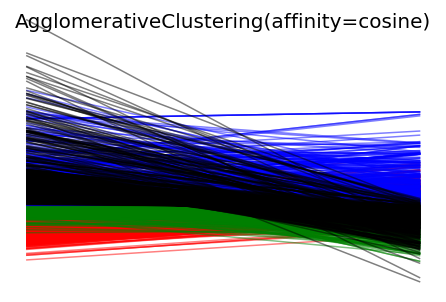

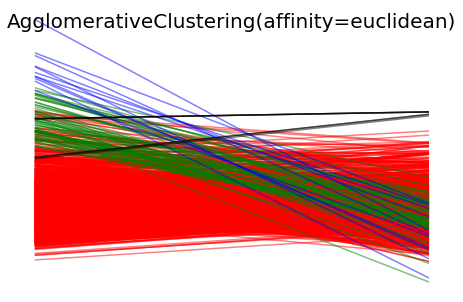

In [96]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import pairwise_distances

n_clusters = 4

# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", affinity=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), "rgbk"):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()

In [97]:
from sklearn.metrics import homogeneity_score
labels_pred = agg.labels_
homogeneity_score(train_labels, labels_pred)

0.03957597907734152

## Finding the optimal number of clusters
We plot the inertia as a function of k and analyze the resulting curve

In [98]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [99]:
print(sorted(inertias))

[7129081.269150411, 7933800.0314494325, 8893464.080644598, 10459329.731425652, 12476594.93122153, 15433943.497780371, 19785672.981398273, 29492446.126012366, 49341971.12899914]


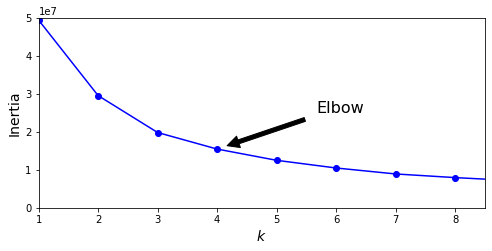

In [100]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 50000000])
plt.show()

As you can see, there is an elbow at k=4, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. This is perfect in this example since it the data contains 4 classes.

Another approach is to look at the silhouette_score. The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [101]:
from sklearn.metrics import silhouette_score

In [102]:
silhouette_score(X, kmeans.labels_)

0.43578564910237383

In [103]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [104]:
print(sorted(silhouette_scores))

[0.3517282979454993, 0.3590944479248705, 0.3670740371764761, 0.36953961533940133, 0.374223184518372, 0.415211275076509, 0.43578564910237383, 0.4505727602898115]


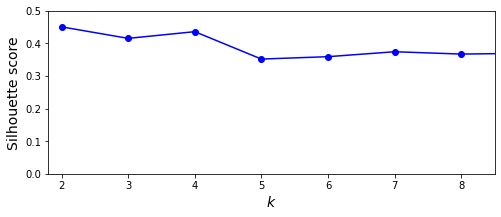

In [105]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.0, 0.50])
plt.show()

This confirms that k = 2 is also a good choice. 